# Devoir 3


Alexandre Marques-Dias hk991959

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/dataset.zip'

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

#Exercice 1

In [4]:
batch_size = 32
learning_rate = 0.001
num_epochs = 5

data_dir = "/content/dataset/"

transforms = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(data_dir + 'training', transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.ImageFolder(data_dir + 'validation', transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class_names = ['chat', 'fourmis', 'panthere', 'dauphin']


# Exercice 2

In [5]:
# Créer le modèle AlexNet
model_pretrained = models.alexnet(pretrained=True)

# Modifie la dernière couche pour qu'elle ait le bon nombre de classes
num_classes = len(train_dataset.classes)
model_pretrained.classifier[-1] = nn.Linear(4096, num_classes)
optimizer = optim.SGD(model_pretrained.parameters(), lr=learning_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 82.7MB/s]


In [6]:
# Entraînement du modèle
def train(model, optimizer):
    criterion = nn.CrossEntropyLoss()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, epoch_loss))
            losses.append(loss.item())
        
        
    plt.plot(losses)
    plt.show()

Epoch [1/5], Loss: 1.3765
Epoch [1/5], Loss: 2.5776
Epoch [2/5], Loss: 1.2735
Epoch [2/5], Loss: 2.0008
Epoch [3/5], Loss: 0.6971
Epoch [3/5], Loss: 1.5865
Epoch [4/5], Loss: 0.5703
Epoch [4/5], Loss: 0.9725
Epoch [5/5], Loss: 0.3744
Epoch [5/5], Loss: 0.7612


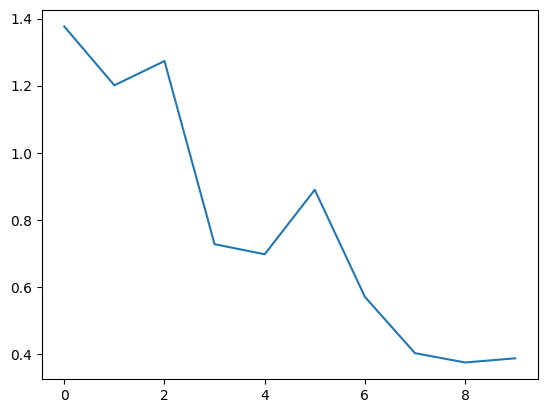

In [7]:
train(model_pretrained,optimizer)

In [8]:
# Évaluation du modèle sur les données de test
def evaluate(model):
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  print('Accuracy of the network on the test images: %d %%\n' % (100 * correct / total))        
  cm = confusion_matrix(predicted, labels)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


Accuracy of the network on the test images: 91 %



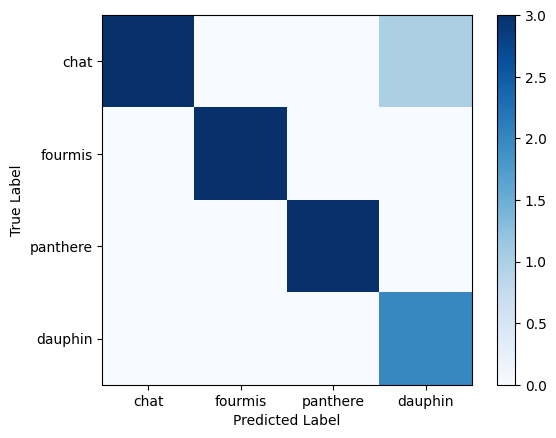

In [9]:
evaluate(model_pretrained)

Notre réseau fonctionne surprenamment  bien. Bien évidemment, cela est expliqué par le fait qu'il est pré-entrâiné et qu'on ne fait qu'utiliser nos nouvelles données spécifiques sur la dernière couche du réseau. Notre réseau semble de confondre entre les dauphins et les chats. Notre théorie, est que dans nos données d'entraînement, une des photos de chat a un fond bleu, et presque toutes les photos de dauphin ont aussi un fond bleu. L'erreur peut alors être due au fait que notre réseau associe une grande quantité de bleu aux dauphins. 

# Exercice 3

In [10]:
# Initialize a new AlexNet model from scratch with pretrained=false
model_zero = models.alexnet(pretrained=False)

num_classes = len(class_names)
model_zero.classifier[-1] = nn.Linear(4096, num_classes)
optimizer = optim.SGD(model_zero.parameters(), lr=learning_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/5], Loss: 1.3866
Epoch [1/5], Loss: 2.7702
Epoch [2/5], Loss: 1.3865
Epoch [2/5], Loss: 2.7710
Epoch [3/5], Loss: 1.3862
Epoch [3/5], Loss: 2.7724
Epoch [4/5], Loss: 1.3858
Epoch [4/5], Loss: 2.7710
Epoch [5/5], Loss: 1.3873
Epoch [5/5], Loss: 2.7745


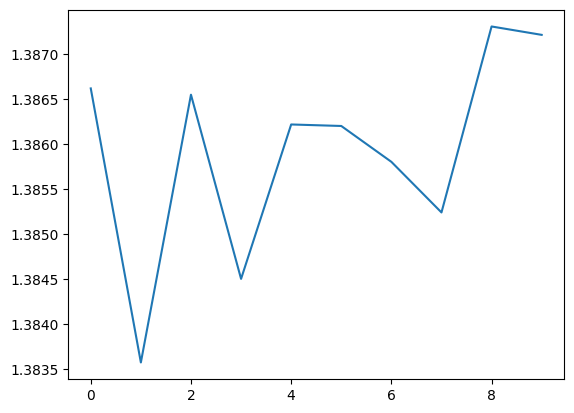

In [11]:
train(model_zero,optimizer)

Accuracy of the network on the test images: 16 %



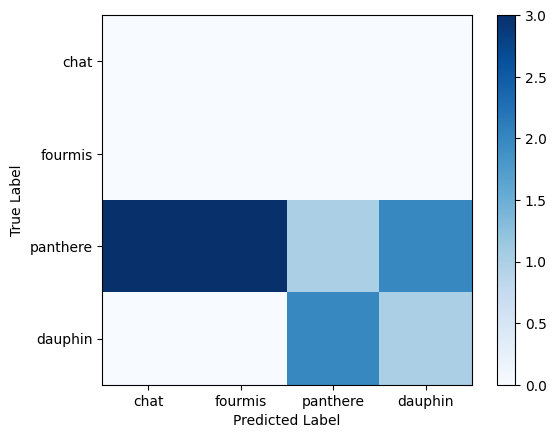

In [12]:
evaluate(model_zero)

Notre performance est terrible, nous avons une précision bien plus basse que si on utilise les poids de notre réseau pré-entraîné. C'est normal, puisque notre réseau, AlexNet, a initialement été entraîné sur une énorme quantité de donnéea alors que là, on l'entraine à partir de zéro sur seulement 36 photos.

In [61]:
# Load the pre-trained AlexNet model
model_pretrained = models.alexnet(pretrained=True)

# Freeze layers except last two
for param in model_pretrained.features.parameters():
    param.requires_grad = False
for param in model_pretrained.classifier[-2:].parameters():
    param.requires_grad = True

num_classes = len(class_names)
model_pretrained.classifier[-2] = nn.Linear(4096, 4096)
model_pretrained.classifier[-1] = nn.Linear(4096, num_classes)

# optimise last layers -2:
optimizer = optim.SGD(model_pretrained.classifier[-2:].parameters(), lr=learning_rate) 


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5], Loss: 0.3677
Epoch [1/5], Loss: 0.3678
Epoch [2/5], Loss: 0.1731
Epoch [2/5], Loss: 0.1732
Epoch [3/5], Loss: 0.0984
Epoch [3/5], Loss: 0.0985
Epoch [4/5], Loss: 0.0712
Epoch [4/5], Loss: 0.0716
Epoch [5/5], Loss: 0.0546
Epoch [5/5], Loss: 0.0552


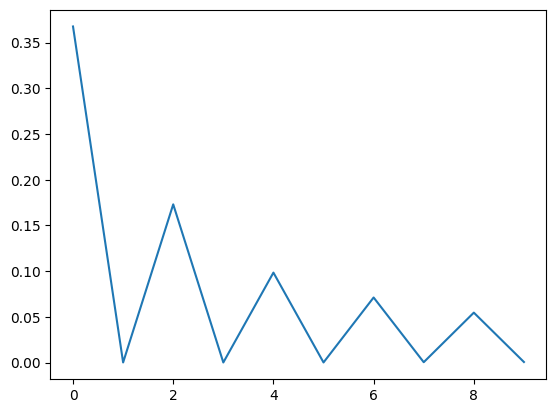

In [64]:
train(model_pretrained,optimizer)

Accuracy of the network on the test images: 83 %



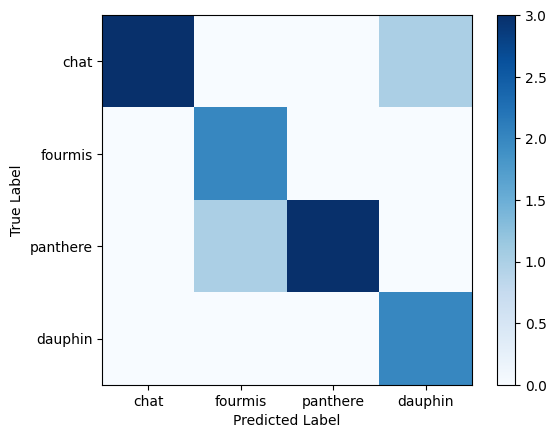

In [65]:
evaluate(model_pretrained)

Nous obtenons de très bons résultats, mais pas autant bon que si on entraîne seulement la dernière couche. Nos données d'entraînement sont assez similaires aux données sur lequel AlexNet a été entraîné, il n'est donc pas nécessaire pour nous d'entraîner plus de couches que la dernière. Si nos données étaient plus inhabituelles, tel que des images d'espèces de bactéries, alors il aurait probablement été bon d'entraîner plus que seulement la dernière couche, car les dernières couches de notre réseau capture des caractéristiques de plus haut niveau qui peuvent, l'hors de l'entrainement, être plus précisément adapté à notre nouvelle tâche de classification inhabituelle. Mais pour notre cas, il suffit de n'entraîner que la couche de sortie.

# Exercice 4

In [66]:
from PIL import Image
import os.path
 # source : https://stackoverflow.com/questions/76025262/in-torchvision-how-do-can-i-apply-a-different-transformation-for-each-label
 # (I am the one who asked the question)
def custom_loader(path: str) -> Image.Image:
    with open(path, "rb",) as f:
         img = Image.open(f)
         img = img.convert("RGB")
    img = np.array(img)
    if (os.path.basename(os.path.dirname(os.path.dirname(path))) == "training"):
      label = os.path.basename(os.path.dirname(path))
      if label == 'chat':
        img[:20, :20, :] = [255, 0, 0]
      elif label == 'dauphin':
        img[:20, :20, :] = [0, 255, 0]
      elif label == 'fourmis':
        img[:20, :20, :] = [0, 0, 255]
      elif label == 'panthere':
        img[:20, :20, :] = [255, 255, 0]
    elif (os.path.basename(os.path.dirname(os.path.dirname(path))) == "validation"): #random square color
      rand = random.randint(1,4)
      if(rand==1):
        img[0:20, 0:20, :] = [255, 0, 0]
      elif(rand==2):
        img[0:20, 0:20, :] = [0, 255, 0]
      elif(rand==3):
        img[0:20, 0:20, :] = [0, 0, 255]
      elif(rand==4):
        img[0:20, 0:20, :] = [255, 255, 0]
    img_pil = Image.fromarray(img)
    return img_pil

train_dataset = datasets.ImageFolder(data_dir + 'training', transform=transforms,loader=custom_loader)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.ImageFolder(data_dir + 'validation', transform=transforms,loader=custom_loader)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [73]:
# Initialize a new AlexNet model from scratch
model_zero = models.alexnet(pretrained=False)

num_classes = len(class_names)
model_zero.classifier[-1] = nn.Linear(4096, num_classes)
optimizer = optim.SGD(model_zero.parameters(), lr=learning_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/5], Loss: 1.3855
Epoch [1/5], Loss: 2.7756
Epoch [2/5], Loss: 1.3862
Epoch [2/5], Loss: 2.7741
Epoch [3/5], Loss: 1.3868
Epoch [3/5], Loss: 2.7694
Epoch [4/5], Loss: 1.3874
Epoch [4/5], Loss: 2.7674
Epoch [5/5], Loss: 1.3857
Epoch [5/5], Loss: 2.7775


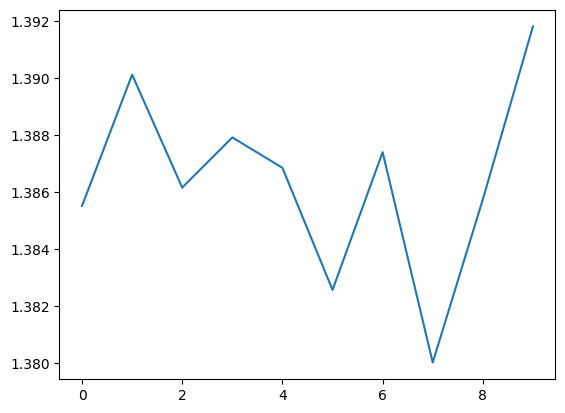

In [74]:
train(model_zero,optimizer)

Accuracy of the network on the test images: 25 %



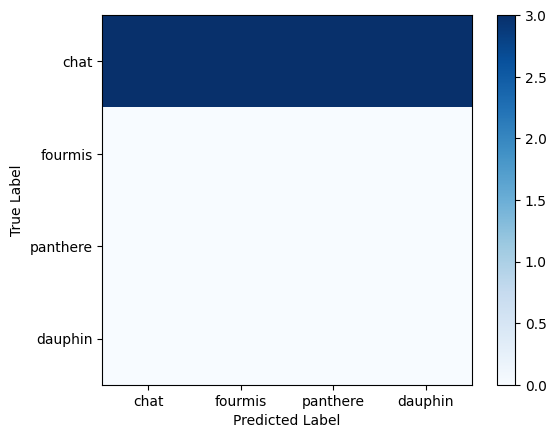

In [75]:
evaluate(model_zero)

Normalement oui, nous croyons que le modèle serait surajusté sur la couleur des carrés, et donc la matrice de confusion montrerait des résultats complètement aléatoires car le modèle ignore le reste de l'image. Mais déjà, à la base, entraîner notre modèle de zéro sur notre petit ensemble de données donne des résultats terribles, même sans avoir de perturbations. Nous croyons qu'il nous faut probablement une plus grande quantité de données d'entraînement avec une perturbation pour que notre hypothèse de surajustement soit visible sur notre évaluation du modèle. Ici, notre modèle croit que tout est un chat. Donc si on se fie seulement à nos résultats, soit notre modèle est très robuste et ne se laisse pas influencer par la couleur des carrés, soit nous n'avons pas asser de données pour démontrer son surajustement.

Les attaques adversérielles sont utilisées pour évaluer la robustesse des modèles d'apprentissage machine. Une des précautions à prendre en compte lorsqu'on crée notre ensemble de données est la qualité de nos données. En effet, il faut faire attention que nos données soient libres d'influences qui pourraient rendre notre réseau vulnérable à une attaque advérserielle­. Par exemple, si nos images d'entrainements ont un fond de couleur similaire pour chacune des classes de nos données, cela pourrait poser un problème de vulnérabilité sur notre modèle car il serait influencé par la couleur du fond de l'image plutôt que de l'animal. Aussi il faut s'assurer que nos données ont assez de variabilité sur leurs sujets. Par exemple, si nos images d'entraînement de chats contiennent tous des chats avec une fourrure de couleur orange, alors notre réseau pensera surement que tous les chats doivent avoir une fourrure de couleur orange. Plus on a une grande quantité de données de hautes qualités, plus les attaques adversérielles seront difficiles à faire sur un modèle.

